In [3]:
import os
import sys
import random
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from event_count_seq_dataset import ECountSeqDataset

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


save_path = "./../preprocessing_data/val_data_0628_8_ecount_3.pkl"
with open(save_path, 'rb') as f:
    print(f"正在加载数据集: {save_path} ...")
    loaded_ds = pickle.load(f)
print(f"成功加载数据集，包含 {len(loaded_ds)} 个样本")

正在加载数据集: ./../preprocessing_data/val_data_0628_8_ecount_3.pkl ...
成功加载数据集，包含 10157 个样本



随机样本 #693:
  - 形状: (8192, 4)
  - 标签: 0
  - 点云范围: t[0.39, 0.42], x[60.00, 278.00], y[25.00, 235.00]

数据集文件大小: 2539.73 MB


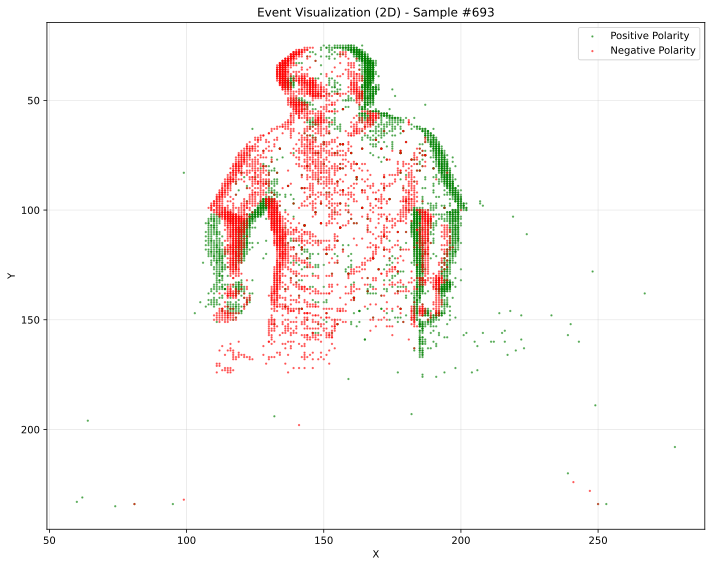

In [4]:
# 单个样本 shape为 [N, 4]， N为点云点数
sample_idx = 693  # For reproducibility, set a specific index
# sample_idx = random.randint(0, len(loaded_ds)-1) # 随机选择一个样本

sample_data, sample_label = loaded_ds[sample_idx]
print(f"\n随机样本 #{sample_idx}:")
print(f"  - 形状: {sample_data.shape}")
print(f"  - 标签: {sample_label}")
print(f"  - 点云范围: t[{sample_data[:, 0].min():.2f}, {sample_data[:, 0].max():.2f}], "
        f"x[{sample_data[:, 1].min():.2f}, {sample_data[:, 1].max():.2f}], "
        f"y[{sample_data[:, 2].min():.2f}, {sample_data[:, 2].max():.2f}]")

file_size_mb = os.path.getsize(save_path) / (1024 * 1024)
print(f"\n数据集文件大小: {file_size_mb:.2f} MB")

"""
可视化这个样本
xy理解成2D点云的坐标xy
p极性为正用绿色,负用红色
"""
# Create a 2D plot
plt.figure(figsize=(10, 8))

# Extract coordinates
x = sample_data[:, 1]  # x coordinate
y = sample_data[:, 2]  # y coordinate
p = sample_data[:, 3]  # polarity
positive_mask = p > 0
negative_mask = p <= 0
# Plot positive polarity points (green)
plt.scatter(x[positive_mask], y[positive_mask], c='green', s=2, alpha=0.5, label='Positive Polarity')

# Plot negative polarity points (red)
plt.scatter(x[negative_mask], y[negative_mask], c='red', s=2, alpha=0.5, label='Negative Polarity')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Event Visualization (2D) - Sample #{sample_idx}')

# Add a legend
plt.legend()

# Invert y-axis to match conventional image coordinates
plt.gca().invert_yaxis()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# plt.savefig(f'event_visualization_2d_sample_{sample_idx}.png', dpi=600)



In [ ]:
# 单个样本 shape为 [N, 4]， N为点云点数
sample_idx = 693  # For reproducibility, set a specific index
# sample_idx = random.randint(0, len(loaded_ds)-1) # 随机选择一个样本

sample_data, sample_label = loaded_ds[sample_idx]
print(f"\n随机样本 #{sample_idx}:")
print(f"  - 形状: {sample_data.shape}")
print(f"  - 标签: {sample_label}")
print(f"  - 点云范围: t[{sample_data[:, 0].min():.2f}, {sample_data[:, 0].max():.2f}], "
        f"x[{sample_data[:, 1].min():.2f}, {sample_data[:, 1].max():.2f}], "
        f"y[{sample_data[:, 2].min():.2f}, {sample_data[:, 2].max():.2f}]")

file_size_mb = os.path.getsize(save_path) / (1024 * 1024)
print(f"\n数据集文件大小: {file_size_mb:.2f} MB")

"""
可视化这个样本
txy理解成3D点云的坐标xyz(t相当于z坐标)
p极性为正用绿色,负用红色
"""

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
t = sample_data[:, 0]  # timestamp as z
x = sample_data[:, 1]  # x coordinate
y = sample_data[:, 2]  # y coordinate
p = sample_data[:, 3]  # polarity

# Plot positive polarity points (green)
positive_mask = p > 0
ax.scatter(x[positive_mask], y[positive_mask], t[positive_mask], 
            c='green', s=1, alpha=0.5, label='Positive Polarity')

# Plot negative polarity points (red)
negative_mask = p <= 0
ax.scatter(x[negative_mask], y[negative_mask], t[negative_mask], 
            c='red', s=1, alpha=0.5, label='Negative Polarity')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time (t)')
ax.set_title(f'Event Cloud Visualization - Sample #{sample_idx}')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

# plt.savefig(f'event_visualization_3d_sample_{sample_idx}.png', dpi=600)